## Time Series Explore Exercises:
Do your work for this exercise in a notebook named explore.ipynb. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

Note: When resampling data, use a mean() aggregation method.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta, datetime

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

## Store Item Demand dataset:
>Load your store item demand data using your acquire and/or prepare functions.

>Using a human-based approach, split your dataset into train and test sets.
>Visualize your train-test split.
Only use your train data set to perform the following tasks:

>Resample your data and visualize it.
Creating a rolling (moving) average of your data and visualize it.
Plot the difference in sales from one day to the next.
Plot the % difference in sales from one day to the next.
Plot the % difference in sales from one week to the next.
Plot the % difference in sales from one month to the next.
Visualize an autocorrelation plot on a weekly resampling.
Visualize a seasonal decomposition plot on a weekly resampling.


### Exercise 1)
Load your store item demand data using your acquire and/or prepare functions.

In [2]:
#acquire
df = acquire.get_store_item_demand_data()

#prepare
df = prepare.prep_storeitems(df)
df.head()

,item_id,sale_amount,sale_id,store_id,Unnamed: 0_x,store_address,store_city,store_state,store_zipcode,Unnamed: 0_y,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,41,6.0,730401,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,01-Jan,Tuesday,33.72
2013-01-01 00:00:00+00:00,48,21.0,865525,5,4,1520 Austin Hwy,San Antonio,TX,78218,7,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,01-Jan,Tuesday,78.12
2013-01-01 00:00:00+00:00,41,11.0,743183,8,7,15000 San Pedro Ave,San Antonio,TX,78232,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,01-Jan,Tuesday,61.82
2013-01-01 00:00:00+00:00,48,34.0,863699,4,3,516 S Flores St,San Antonio,TX,78204,7,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,01-Jan,Tuesday,126.48
2013-01-01 00:00:00+00:00,48,28.0,861873,3,2,2118 Fredericksburg Rdj,San Antonio,TX,78201,7,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,01-Jan,Tuesday,104.16


### Exercise 2)
Using a human-based approach, split your dataset into train and test sets. Visualize your train-test split. Only use your train data set to perform the following tasks:



In [3]:
df.index.value_counts()

2013-01-01 00:00:00+00:00    100
2016-05-11 00:00:00+00:00    100
2016-05-09 00:00:00+00:00    100
2016-05-08 00:00:00+00:00    100
2016-05-07 00:00:00+00:00    100
                            ... 
2014-08-29 00:00:00+00:00    100
2014-08-28 00:00:00+00:00    100
2014-08-27 00:00:00+00:00    100
2014-08-26 00:00:00+00:00    100
2017-12-31 00:00:00+00:00    100
Name: sale_date, Length: 1826, dtype: int64

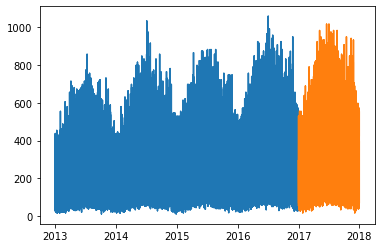

In [4]:
train = df[:'2016'] # includes 2016
test = df['2017'] 

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)



In [5]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00     33.72
2013-01-01 00:00:00+00:00     78.12
2013-01-01 00:00:00+00:00     61.82
2013-01-01 00:00:00+00:00    126.48
2013-01-01 00:00:00+00:00    104.16
Name: sales_total, dtype: float64

In [6]:
train.groupby('month').describe()

item_id                                               sale_amount  \
          count  mean       std   min   25%   50%   75%   max       count   
month                                                                       
01-Jan  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   
02-Feb  11300.0  45.5  2.872408  41.0  43.0  45.5  48.0  50.0     11300.0   
03-Mar  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   
04-Apr  12000.0  45.5  2.872401  41.0  43.0  45.5  48.0  50.0     12000.0   
05-May  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   
06-Jun  12000.0  45.5  2.872401  41.0  43.0  45.5  48.0  50.0     12000.0   
07-Jul  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   
08-Aug  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   
09-Sep  12000.0  45.5  2.872401  41.0  43.0  45.5  48.0  50.0     12000.0   
10-Oct  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   
11-Nov  12000.0  45.5  2.872401  41.0  43.0  45.5  48.0  50.0     12000.0   
12-Dec  12400.0  45.5  2.872397  41.0  43.0  45.5  48.0  50.0     12400.0   

                   ...    item_upc14               sales_total              \
             mean  ...           75%           max       count        mean   
month              ...                                                       
01-Jan  29.435323  ...  7.940027e+10  8.846237e+11     12400.0  162.846502   
02-Feb  32.614159  ...  7.940027e+10  8.846237e+11     11300.0  180.447636   
03-Mar  39.254758  ...  7.940027e+10  8.846237e+11     12400.0  217.167471   
04-Apr  45.570583  ...  7.940027e+10  8.846237e+11     12000.0  252.007752   
05-May  49.098065  ...  7.940027e+10  8.846237e+11     12400.0  271.708126   
06-Jun  52.288917  ...  7.940027e+10  8.846237e+11     12000.0  289.225738   
07-Jul  55.555081  ...  7.940027e+10  8.846237e+11     12400.0  307.350571   
08-Aug  49.066129  ...  7.940027e+10  8.846237e+11     12400.0  271.522499   
09-Sep  45.601000  ...  7.940027e+10  8.846237e+11     12000.0  252.200512   
10-Oct  42.416935  ...  7.940027e+10  8.846237e+11     12400.0  234.647409   
11-Nov  45.896250  ...  7.940027e+10  8.846237e+11     12000.0  254.004952   
12-Dec  32.539194  ...  7.940027e+10  8.846237e+11     12400.0  180.009921   

                                                           
               std    min     25%     50%     75%     max  
month                                                      
01-Jan   86.271714  14.76   95.54  148.26  213.20   571.2  
02-Feb   95.279363  16.86  105.90  162.38  238.50   655.2  
03-Mar  112.752196  16.86  129.26  197.16  285.60   756.0  
04-Apr  130.207576  32.67  148.26  228.78  333.90   865.2  
05-May  139.155150  29.52  162.36  247.10  358.05   924.0  
06-Jun  147.922108  20.79  169.74  264.00  381.60   966.0  
07-Jul  158.007412  38.61  182.28  279.00  404.80  1058.4  
08-Aug  139.750494  39.34  162.18  245.52  358.80   907.2  
09-Sep  130.041561  28.10  148.50  228.96  331.82   924.0  
10-Oct  121.239952  11.24  140.22  213.20  310.80   831.6  
11-Nov  131.269754  16.86  148.80  228.96  334.80   949.2  
12-Dec   94.647501  11.24  104.94  162.75  237.60   655.2  

[12 rows x 88 columns]

<AxesSubplot:xlabel='month', ylabel='sales_total'>

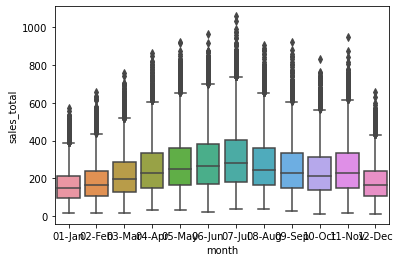

In [7]:
# boxplot for each month
sns.boxplot(data = train, x = 'month', y = 'sales_total')

[Text(0.5, 1.0, 'Average Sales by Day of Week')]

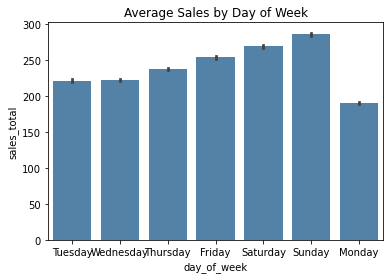

In [8]:
sns.barplot(data=train, x='day_of_week', y='sales_total', color='steelblue')\
    .set(title='Average Sales by Day of Week')

<AxesSubplot:xlabel='sale_date'>

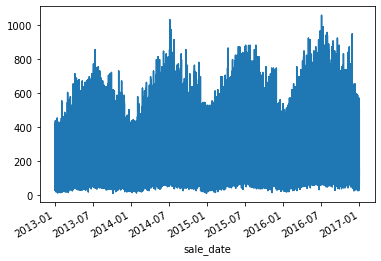

In [9]:
y.plot()

- ### Resample your data and visualize it. 

<AxesSubplot:title={'center':'Quarterly average'}, xlabel='sale_date'>

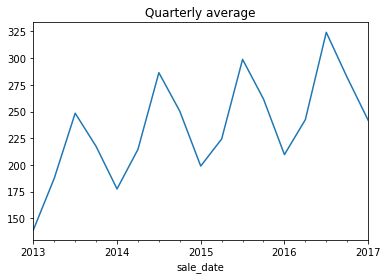

In [10]:
#resampling by quarterly (3 months)
y.resample('3M').mean().plot(title='Quarterly average')

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

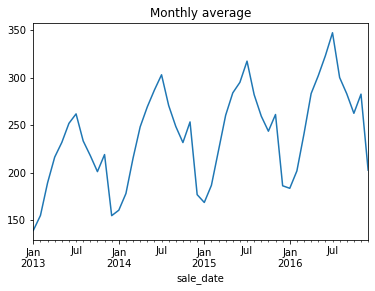

In [11]:
#resampling by month
y.resample('M').mean().plot(title='Monthly average')

- ### Creating a rolling (moving) average of your data and visualize it. 

In [12]:
y = y.resample('D').mean()
y.head()

sale_date
2013-01-01 00:00:00+00:00    127.1558
2013-01-02 00:00:00+00:00    133.1571
2013-01-03 00:00:00+00:00    141.2052
2013-01-04 00:00:00+00:00    148.6053
2013-01-05 00:00:00+00:00    156.4595
Freq: D, Name: sales_total, dtype: float64

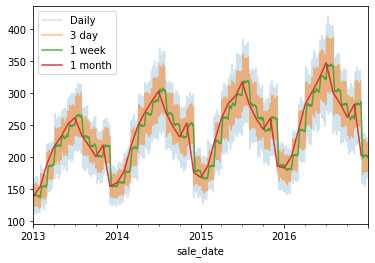

In [13]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
y.resample('M').mean().plot(alpha=.9, label='1 month')
plt.legend()


- ### Plot the difference in sales from one day to the next.

<AxesSubplot:title={'center':'Daily Difference in Sales Totals'}, xlabel='sale_date'>

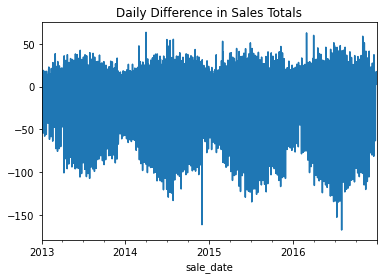

In [14]:
y.diff().plot(title='Daily Difference in Sales Totals')

<AxesSubplot:title={'center':'Daily % Change in Temperature'}, xlabel='sale_date'>

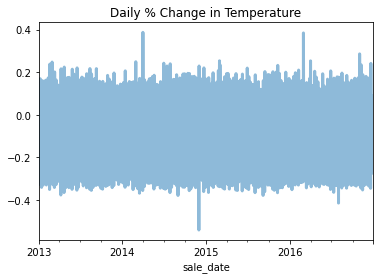

In [15]:
#taking the y.shift()and divide from the diff number it gives us the overall % of the daily sales
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Daily % Change in Temperature')

- ### Plot the % difference in sales from one week to the next.

In [16]:
#let's try resampling by week
y.resample('W').mean().diff()

sale_date
2013-01-06 00:00:00+00:00          NaN
2013-01-13 00:00:00+00:00    -3.726083
2013-01-20 00:00:00+00:00    -2.282443
2013-01-27 00:00:00+00:00    -1.157657
2013-02-03 00:00:00+00:00     8.437129
                               ...    
2016-12-04 00:00:00+00:00   -48.538800
2016-12-11 00:00:00+00:00   -34.028686
2016-12-18 00:00:00+00:00     2.318314
2016-12-25 00:00:00+00:00    -2.101657
2017-01-01 00:00:00+00:00    -6.163695
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

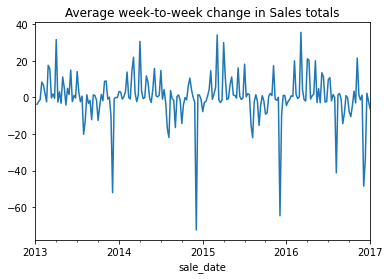

In [17]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in Sales totals');

- ### Plot the % difference in sales from one month to the next. 

In [18]:
#resampling by month
y.resample('M').mean().diff()

sale_date
2013-01-31 00:00:00+00:00          NaN
2013-02-28 00:00:00+00:00    15.717078
2013-03-31 00:00:00+00:00    34.376525
2013-04-30 00:00:00+00:00    27.071801
2013-05-31 00:00:00+00:00    15.491009
2013-06-30 00:00:00+00:00    20.106308
2013-07-31 00:00:00+00:00     9.952634
2013-08-31 00:00:00+00:00   -28.482423
2013-09-30 00:00:00+00:00   -15.484768
2013-10-31 00:00:00+00:00   -16.829032
2013-11-30 00:00:00+00:00    17.954019
2013-12-31 00:00:00+00:00   -64.346132
2014-01-31 00:00:00+00:00     5.756797
2014-02-28 00:00:00+00:00    17.563540
2014-03-31 00:00:00+00:00    37.233905
2014-04-30 00:00:00+00:00    33.012610
2014-05-31 00:00:00+00:00    21.012445
2014-06-30 00:00:00+00:00    17.750698
2014-07-31 00:00:00+00:00    16.053395
2014-08-31 00:00:00+00:00   -32.360410
2014-09-30 00:00:00+00:00   -22.068666
2014-10-31 00:00:00+00:00   -16.951605
2014-11-30 00:00:00+00:00    21.716325
2014-12-31 00:00:00+00:00   -76.587528
2015-01-31 00:00:00+00:00    -8.228774
2015-02-28 00:0

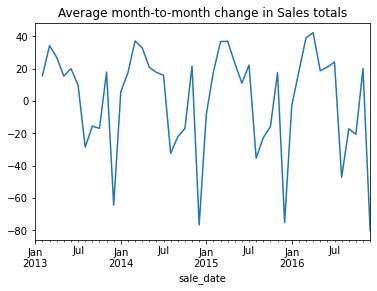

In [19]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Sales totals');

- ### Visualize an autocorrelation plot on a weekly resampling. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

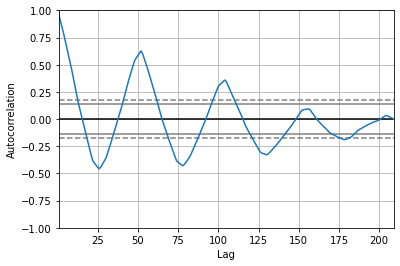

In [20]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

- ### Visualize a seasonal decomposition plot on a weekly resampling.

In [21]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [22]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,145.440883,NaN,-68.403764,NaN
2013-01-13 00:00:00+00:00,141.714800,NaN,-69.521641,NaN
2013-01-20 00:00:00+00:00,139.432357,NaN,-71.364907,NaN
2013-01-27 00:00:00+00:00,138.274700,NaN,-71.174001,NaN
2013-02-03 00:00:00+00:00,146.711829,NaN,-69.021914,NaN


<AxesSubplot:xlabel='sale_date'>

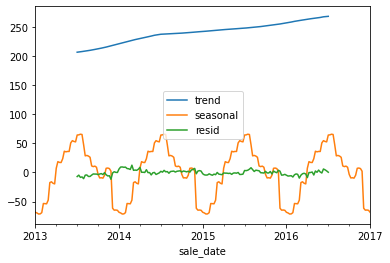

In [23]:
decomposition.iloc[:, 1:].plot()

__________________________________________________________________________________________________________

## OPS data
Load your OPS data using your acquire and/or prepare functions.

In [24]:
df_ops = acquire.get_opsd_data()

df_ops = prepare.prep_ops(df_ops)
df_ops.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006


In [25]:
df_ops.tail()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,12-Dec,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12-Dec,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12-Dec,2017
2017-12-30,1215.44897,721.247,7.467,728.714,12-Dec,2017
2017-12-31,1107.11488,721.176,19.980,741.156,12-Dec,2017


Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.
Only use the train data set to perform the following tasks:

In [26]:
train = df_ops[:'2013'] # includes 2013
test = df_ops['2013':] 


- ### Visualize your train-test split.

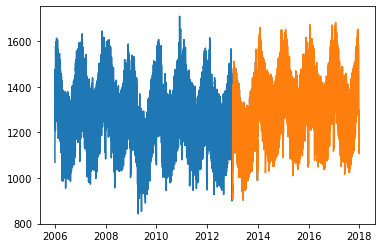

In [27]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

- ### Plot the consumption, wind, and solar data on the same chart.

<AxesSubplot:xlabel='Date'>

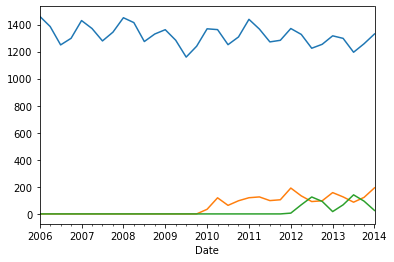

In [28]:
train.Consumption.resample('3M').mean().plot()
train.Wind.resample('3M').mean().plot()
train.Solar.resample('3M').mean().plot()


In [29]:
weather = pd.DataFrame({
    'Consumption': train.Consumption.resample('3M').mean(),
    'Wind': train.Wind.resample('3M').mean(),
    'Solar': train.Solar.resample('3M').mean()
})
weather.head()

,Consumption,Wind,Solar
Date,,,
2006-01-31,1461.442065,0.0,0.0
2006-04-30,1385.493079,0.0,0.0
2006-07-31,1249.606283,0.0,0.0
2006-10-31,1298.369228,0.0,0.0
2007-01-31,1429.565217,0.0,0.0


<AxesSubplot:xlabel='Date'>

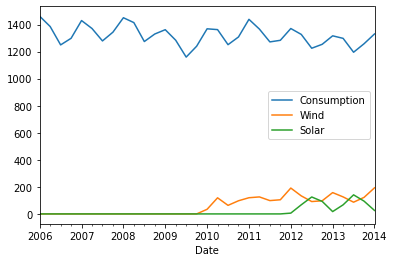

In [30]:
weather.iloc[:, 0:].plot()

Text(0, 0.5, 'units')

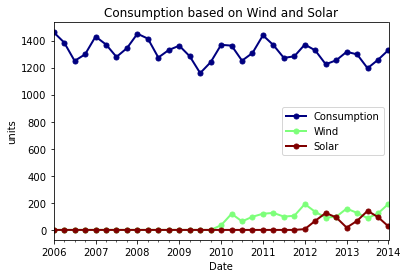

In [31]:
ax = weather.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Consumption based on Wind and Solar')
ax.set_xlabel("Date")
ax.set_ylabel("units")

In [32]:
weather.head()

,Consumption,Wind,Solar
Date,,,
2006-01-31,1461.442065,0.0,0.0
2006-04-30,1385.493079,0.0,0.0
2006-07-31,1249.606283,0.0,0.0
2006-10-31,1298.369228,0.0,0.0
2007-01-31,1429.565217,0.0,0.0


- ### Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

In [33]:
twentyten = pd.DataFrame({
    'Consumption': train.Consumption,
    '2010': train.Consumption == '2010'
})
twentyten.head()

,Consumption,2010
Date,,
2006-01-01,1069.184,False
2006-01-02,1380.521,False
2006-01-03,1442.533,False
2006-01-04,1457.217,False
2006-01-05,1477.131,False


In [34]:
#smoothing time series by creating rolling by mean over 3 point window (triang) of the data
usage = twentyten.rolling(window=3, center=True, win_type='triang').mean()


In [35]:
#creating a dataframe of just Consumption and adding columns for day and year
usage.name = 'Consumption'
usage['day'] = usage.index.dayofyear
usage['month'] = usage.index.month
usage['Year'] = usage.index.year


In [36]:
usage.head()

,Consumption,2010,day,month,Year
Date,,,,,
2006-01-01,NaN,NaN,1,1,2006
2006-01-02,1318.18975,0.0,2,1,2006
2006-01-03,1430.70100,0.0,3,1,2006
2006-01-04,1458.52450,0.0,4,1,2006
2006-01-05,1453.72650,0.0,5,1,2006


<AxesSubplot:xlabel='month'>

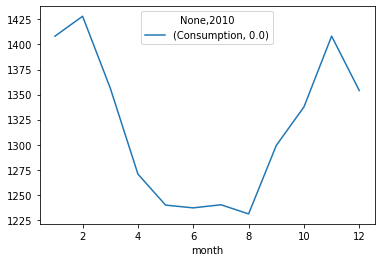

In [37]:
#creating a pivot table of Consumption
piv = pd.pivot_table(usage, index=['month'],columns=['2010'], values=['Consumption'], dropna=True, observed=True)
piv.plot()

- ### Resample the consumption data to monthly and plot it.


<AxesSubplot:xlabel='Date'>

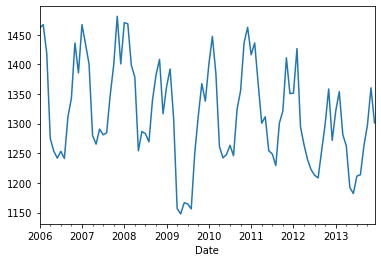

In [38]:
train.Consumption.resample('M').mean().plot()

- ### Resample the consumption data to yearly and plot it.

<AxesSubplot:xlabel='Date'>

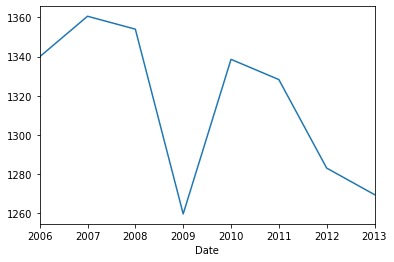

In [39]:
train.Consumption.resample('Y').mean().plot()

In [40]:
#Notes: Odd that 2009 is maybe missing?? Wondering what happened here...

### BONUS:
- Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.
- Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.
- Create a subseasonal plot by month of your consumption data.
- Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?
- Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?
- Plot a time series decomposition for your consumption data and note your takeaways.
- Create an autocorrelation plot of a weekly resampling of the consumption data.